In [1]:
# Imports dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Imports Resource csv files as DataFrames

cash_flow = pd.read_csv('Resources/cash_flow.csv', index_col = 'Value')
balance_sheet = pd.read_csv('Resources/balance_sheet.csv', index_col = 'Value')
profit_loss = pd.read_csv('Resources/profit_loss.csv', index_col = 'Value')
profit_loss.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Value,,,,,,,,,,
Revenue,77946,88915,99137,105156,112640,116199,118719,129025,141576,152703
Cost of revenue,-67995,-77739,-86823,-91948,-98458,-101065,-102901,-111882,-123152,-132886
Gross Profit,9951,11176,12314,13208,14182,15134,15818,17143,18424,19817
Operating Expenses,-7874,-8737,-9555,-10155,-10962,-11510,-12146,-13032,-13944,-15080
Operating Income (Loss),2077,2439,2759,3053,3220,3624,3672,4111,4480,4737


In [3]:
# Calculates Working Capital Ratio

total_ca = balance_sheet.loc['Total Current Assets'].astype(int)
total_cl = balance_sheet.loc['Total Current Liabilities'].astype(int)

working_capital = total_ca / total_cl
working_capital.head()

2010    1.163470
2011    1.137427
2012    1.103263
2013    1.194840
2014    1.220372
dtype: float64

In [4]:
# Calculates Quick Ratio

inventories = balance_sheet.loc['Inventories'].astype(int)

quick_ratio = (total_ca - inventories) / total_cl
quick_ratio.head()

2010    0.603200
2011    0.586556
2012    0.524470
2013    0.599381
2014    0.633639
dtype: float64

In [5]:
# Calculates Debt to Equity Ratio

# Replaces null values with zeroes
balance_sheet = balance_sheet.replace(np.nan, 0)

short_debt = balance_sheet.loc['Short Term Debt'].astype(int)
long_debt = balance_sheet.loc['Long Term Debt'].astype(int)
equity = balance_sheet.loc['Total Equity'].astype(int)

debt_to_equity = (short_debt + long_debt) / equity
debt_to_equity.head()

2010    0.198262
2011    0.171240
2012    0.110321
2013    0.453869
2014    0.406952
dtype: float64

In [6]:
# Calculates Earnings Per Share

profit_eps = profit_loss.loc['Net Income Available to Common Shareholders'].astype(int)

# Shares taken from seperate data source, outstanding shares for end of year
years = ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019')
shares = pd.Series((432333947, 433365150, 432424379, 436922037, 437762068, 437406636, 437126569,\
                    436989606, 438208376, 439656950), years)


eps = profit_eps / shares

# Adjustment made since shares data is not rounded
eps = eps * 1000000
eps.head()

2010    3.013874
2011    3.373598
2012    3.952136
2013    4.666736
2014    4.701184
dtype: float64

In [7]:
# Calculates Price to Earnings Ratio

# Yearly Average Stock Price also taken from seperate data set
years = ('2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019')
yavg_price = pd.Series((60.67, 78.74, 92.06, 111.08, 121.58, 147.84, 154.35, 167.41, 208.81, 262.62), years)

p_to_e = yavg_price / eps
p_to_e.head()

2010    20.130238
2011    23.340063
2012    23.293732
2013    23.802501
2014    25.861571
dtype: float64

In [8]:
# Creates a DataFrame to store the ratios

temp = pd.DataFrame([working_capital, quick_ratio, debt_to_equity, eps, p_to_e],\
                    index = ['Working Capital', 'Quick Ratio', 'Debt to Equity', 'EPS', 'Price to Earnings'])
ratios_df = temp.transpose()
ratios_df.head()

,Working Capital,Quick Ratio,Debt to Equity,EPS,Price to Earnings
2010,1.163470,0.603200,0.198262,3.013874,20.130238
2011,1.137427,0.586556,0.171240,3.373598,23.340063
2012,1.103263,0.524470,0.110321,3.952136,23.293732
2013,1.194840,0.599381,0.453869,4.666736,23.802501
2014,1.220372,0.633639,0.406952,4.701184,25.861571


Text(0, 0.5, 'EPS')

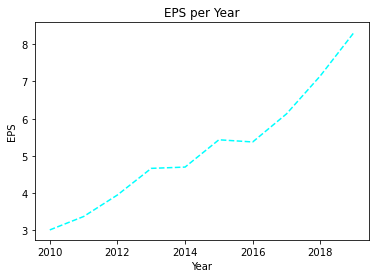

In [30]:
ratios_df['EPS'].plot(color = 'cyan', linestyle = 'dashed')
plt.title('EPS per Year')
plt.xlabel('Year')
plt.ylabel('EPS')

Text(0, 0.5, 'Working Capital Ratio')

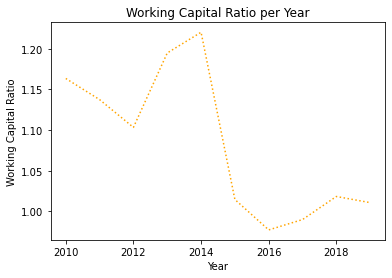

In [34]:
ratios_df['Working Capital'].plot(color = 'orange', linestyle='dotted')
plt.title('Working Capital Ratio per Year')
plt.xlabel('Year')
plt.ylabel('Working Capital Ratio')

Text(0, 0.5, 'Quick Ratio')

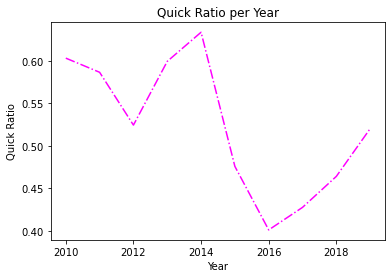

In [37]:
ratios_df['Quick Ratio'].plot(color = 'magenta', linestyle = '-.')
plt.title('Quick Ratio per Year')
plt.xlabel('Year')
plt.ylabel('Quick Ratio')

Text(0, 0.5, 'Debt to Equity Ratio')

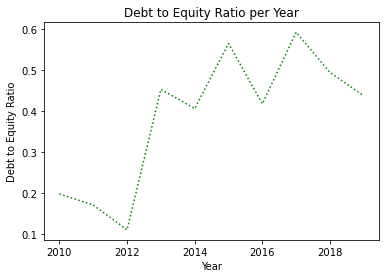

In [44]:
ratios_df['Debt to Equity'].plot(color = 'green', linestyle = ':')
plt.title('Debt to Equity Ratio per Year')
plt.xlabel('Year')
plt.ylabel('Debt to Equity Ratio')

Text(0, 0.5, 'Price to Earnings Ratio')

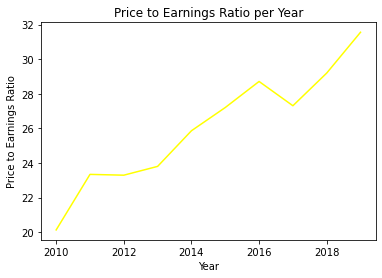

In [41]:
ratios_df['Price to Earnings'].plot(color = 'yellow', linestyle = 'solid')
plt.title('Price to Earnings Ratio per Year')
plt.xlabel('Year')
plt.ylabel('Price to Earnings Ratio')